## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_of_mice = combined_df['Mouse ID'].count()
unique_mice = combined_df['Mouse ID'].nunique()

# num_of_mice
# unique_mice

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_info

#Therefore, the duplicate mouse found by 'Mouse ID' AND 'Timepoint' is "g989".

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = clean_df['Mouse ID'].count()
unique_mice = clean_df['Mouse ID'].nunique()

# num_of_mice
# unique_mice

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen.
# This method is the most straighforward, creating multiple series and putting them all together at the end.
for_stats = clean_df.groupby('Drug Regimen')
mean = for_stats['Tumor Volume (mm3)'].mean()
median = for_stats['Tumor Volume (mm3)'].median()
variance = for_stats['Tumor Volume (mm3)'].var()
st_dev = for_stats['Tumor Volume (mm3)'].std()
SEM = for_stats['Tumor Volume (mm3)'].sem()

# mean
# median
# variance
# st_dev
# SEM
summary_stats = pd.DataFrame({
    "Mean": round(mean,3),
    "Median": round(median,3),
    "Variance": round(variance,3),
    "Std Dev": round(st_dev,3),
    "SEM": round(SEM,3)
})
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen
# This method produces everything in a single groupby function.
summary_stats2 = clean_df.groupby('Drug Regimen').aggregate({
    'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]
}).rename(columns= {"mean": "Mean", "median": "Median", "var": "Variance", "std": "Std Dev", "sem": "SEM"})
summary_stats2
# Come back to format numbers to 3 decimal places

Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

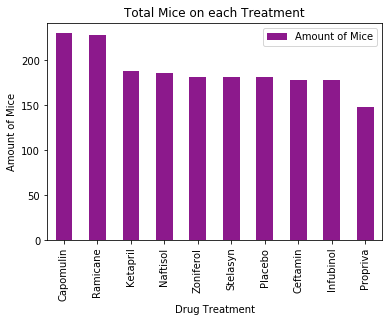

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
# Capomulin    230
# Ramicane     228
# Ketapril     188
# Naftisol     186
# Zoniferol    182
# Stelasyn     181
# Placebo      181
# Ceftamin     178
# Infubinol    178
# Propriva     148

Data = {'Drug Treatment': ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
                       "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"], 
        'Amount of Mice': [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
       }
df = DataFrame(Data, columns=['Drug Treatment','Amount of Mice'])
df.plot(x='Drug Treatment', y='Amount of Mice', kind="bar", color='purple', alpha=0.9)
# plt.xlim(-0.75, len(x)-0.25)
# plt.ylim(0, max(y)+25)
plt.title("Total Mice on each Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Amount of Mice")
plt.show()

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
x = clean_df['Drug Regimen'].unique()
x

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
y = clean_df['Drug Regimen'].value_counts()
y

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

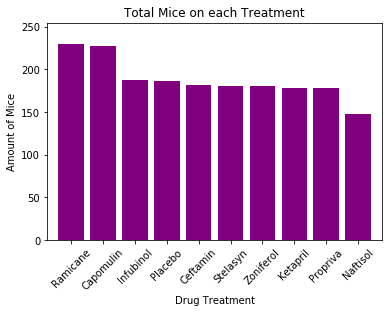

In [11]:
plt.bar(x, y, color='purple', alpha=1, align="center")

plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(y)+25)

plt.title("Total Mice on each Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Amount of Mice")

tick_locations = [value for value in x]
plt.xticks(tick_locations, rotation=45)

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
